<a href="https://colab.research.google.com/github/Darpan9o1/Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install dependencies

#!pip install pandas
#!pip install tweepy
#!pip install vaderSentiment
!pip install requests_html
!pip install pygsheets

In [0]:
# Set input parameters for sentiment analysis
import pandas as pd
import datetime

input = {
    'https://www.metacritic.com/': [
        ('Movies','//*[@id="frontdoor_carousel"]/ul/li[1]/div[1]/div/ol/li/div/a/span/text()'),
        ('Games','//*[@id="frontdoor_carousel"]/ul/li[2]/div[1]/div/ol/li/div/a/span/text()'),
        ('TV','//*[@id="frontdoor_carousel"]/ul/li[3]/div[1]/div/ol/li/div/a/span/text()'),
        ('Music','//*[@id="frontdoor_carousel"]/ul/li[4]/div[1]/div/ol/li/div/a/span/text()')
    ]
}

In [6]:
# Func to webscrape input keywords
 # Generate new session with provided urls
 # Extract keywords from Xpath

def keywordsScrape(input):
  import requests_html
  session = requests_html.HTMLSession()
  df = pd.DataFrame([])
  columnsTitles=['Source','Category','Keyword','Last Updated','Xpath']
  
  for url, cat in input.items():
    response = session.get(url)
    for c in cat:
      category=c[0]
      xpath=c[1]
      lastupdated=datetime.datetime.now()
      keyword=response.html.xpath(c[1])
      df = df.append(pd.DataFrame({
          'Source':url,
          'Category':category,
          'Keyword':keyword,
          'Last Updated':lastupdated,
          'Xpath':xpath
      }))
    
  df = df.reindex(columns=columnsTitles)

  return df      

df1=keywordsScrape(input)
display(df1)


,Source,Category,Keyword,Last Updated,Xpath
0,https://www.metacritic.com/,Movies,Us,2019-03-22 01:11:46.156172,"//*[@id=""frontdoor_carousel""]/ul/li[1]/div[1]/..."
1,https://www.metacritic.com/,Movies,Relaxer,2019-03-22 01:11:46.156172,"//*[@id=""frontdoor_carousel""]/ul/li[1]/div[1]/..."
2,https://www.metacritic.com/,Movies,Pet Sematary,2019-03-22 01:11:46.156172,"//*[@id=""frontdoor_carousel""]/ul/li[1]/div[1]/..."
3,https://www.metacritic.com/,Movies,Captain Marvel,2019-03-22 01:11:46.156172,"//*[@id=""frontdoor_carousel""]/ul/li[1]/div[1]/..."
4,https://www.metacritic.com/,Movies,Dragged Across Concrete,2019-03-22 01:11:46.156172,"//*[@id=""frontdoor_carousel""]/ul/li[1]/div[1]/..."
0,https://www.metacritic.com/,Games,Sekiro: Shadows Die Twice,2019-03-22 01:11:46.249809,"//*[@id=""frontdoor_carousel""]/ul/li[2]/div[1]/..."
1,https://www.metacritic.com/,Games,Devil May Cry 5,2019-03-22 01:11:46.249809,"//*[@id=""frontdoor_carousel""]/ul/li[2]/div[1]/..."
2,https://www.metacritic.com/,Games,Tom Clancy's The Division 2,2019-03-22 01:11:46.249809,"//*[@id=""frontdoor_carousel""]/ul/li[2]/div[1]/..."
3,https://www.metacritic.com/,Games,Anthem,2019-03-22 01:11:46.249809,"//*[@id=""frontdoor_carousel""]/ul/li[2]/div[1]/..."
4,https://www.metacritic.com/,Games,One Piece: World Seeker,2019-03-22 01:11:46.249809,"//*[@id=""frontdoor_carousel""]/ul/li[2]/div[1]/..."


In [0]:
# Pygsheets(Google Sheets API)

def df_to_gsheets(dfNew):
    
    import pygsheets
    
    # Authorization
    gc = pygsheets.authorize(service_file='D:\Github\dataLit\client_secret.json')
    
    # Open sheet and then check existing worksheet
    sh = gc.open('keyword_Source')
    wks = sh.sheet1
    dataSource = wks2.get_as_df()
    
    # Check for existing entries and only update new
    dataAll = pd.concat([dataSource,dataNew])
    
    #wks.set_dataframe(df,(1,1))
    
    return dfAll

df_to_gsheets(df1)


In [15]:
!pwd

/content


In [0]:
  for index,row in dfNew.iterrows():
      
      for i,r in dfSource.iterrows():
        checks = [
          row['Source']==dataSource['Source'],
          row['Category']==dataSource['Category'],
          row['Keyword']==dataSource['Keyword'],
          row['Xpath']==dataSource['Xpath']
        ]

        if all(checks):

In [0]:
d1 =pd.DataFrame({
    'Date':['2013-11-24','2013-11-24','2013-11-24','2013-11-24'],
    'Fruit':['Banana','Orange','Apple','Celery'],
    'Num':[1,2,3,4],
    'Color':['a','b','c','d']
})

d2 =pd.DataFrame({
    'Date':['2013-11-24','2013-11-24','2013-11-24','2013-11-24','2013-11-25','2013-11-25'],
    'Fruit':['Banana','Orange','Apple','Celery','Dragon Fruit','Kiwi'],
    'Num':[1,2,3,4,5,6],
    'Color':['a','b','c','d','e','f']
})

df = pd.concat([d1, d2])
#print(df)
df = df.reset_index(drop=True)
print(df)
df_gpby = df.groupby(list(df.columns))
print(df_gpby)
idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
print(idx)
print(df.reindex(idx))


  Color        Date         Fruit  Num
0     a  2013-11-24        Banana    1
1     b  2013-11-24        Orange    2
2     c  2013-11-24         Apple    3
3     d  2013-11-24        Celery    4
4     a  2013-11-24        Banana    1
5     b  2013-11-24        Orange    2
6     c  2013-11-24         Apple    3
7     d  2013-11-24        Celery    4
8     e  2013-11-25  Dragon Fruit    5
9     f  2013-11-25          Kiwi    6
[8, 9]
  Color        Date         Fruit  Num
8     e  2013-11-25  Dragon Fruit    5
9     f  2013-11-25          Kiwi    6


In [0]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pd.set_option('display.float_format','{:.3f}'.format)

c:\users\darpan\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
#My Twitter API Authentication Variables
consumer_key = '9dz74DpmSM6sOCKXwCwhLvS1U'
consumer_secret = 'udjJMtJzX9Cf7xXnsVFICvDpCOSob99lmKYHeACul8AwelefHz'
access_token = '101421399-fF6vlY9H955qxTdNKRvg77Ksq3gjxw3MS92wNqqH'
access_token_secret = 'bzqsS6tznWs3rTQda6s0RCwgP04Btl31Ug1elSGMrb6Y0'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
data2 = pd.DataFrame([],columns=['Game','Tweets'])

#for game in top_games:
 # tweets = api.search(game, count=200)
  #data = pd.DataFrame(data=[game,tweet.text for tweet in tweets], columns=['Game','Tweets'])
  #data.append(zip(game,[tweet.text for tweet in tweets]))
  #data = data.append(pd.DataFrame({'Game':game,'Tweets':[tweet.text for tweet in tweets]}))
  #pd.DataFrame()

for game in top_games:
  tweets = api.search(game,count=500)
  data1 = pd.DataFrame({
      'Game':game,
      'Tweet time':[tweet.created_at for tweet in tweets],
      'User Name':[tweet.user.screen_name for tweet in tweets],
      'Likes count':[tweet.favorite_count for tweet in tweets],
      'Retweet count':[tweet.retweet_count for tweet in tweets],
      'Source':[tweet.source for tweet in tweets],
      'User Followers':[tweet.user.followers_count for tweet in tweets],
      'Tweets':[tweet.text for tweet in tweets]
  })
  
  data2 = data2.append(data1)


In [0]:
print(tweets)

[Status(_api=<tweepy.api.API object at 0x7fe14e79af28>, _json={'created_at': 'Wed Mar 13 02:25:09 +0000 2019', 'id': 1105656008930664449, 'id_str': '1105656008930664449', 'text': "After 76 hours last week I'm honestly not sure how I'm still alive or going to survive the remaining 53 hours left… https://t.co/ZMtNvYL3Ym", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ZMtNvYL3Ym', 'expanded_url': 'https://twitter.com/i/web/status/1105656008930664449', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 49489428, 'id_str': '49489428', 'name': 'カエラ ・ リー', 'screen_name': '_CrossingOver', 

In [0]:
#print(tweets[0].hashtags)
#print(tweets[0].source)
display(data2.groupby(['Game']).count())

,Likes count,Retweet count,Source,Tweet time,Tweets,User Followers,User Name
Game,,,,,,,
Anthem,98,98,98,98,98,98,98
Assault Android Cactus+,100,100,100,100,100,100,100
Devil May Cry 5,92,92,92,92,92,92,92
Left Alive,100,100,100,100,100,100,100
Metro Exodus,100,100,100,100,100,100,100


In [0]:

display(data2.head(10))
#display(data2.groupby(['Game']).count())
#display(data.head(10))
#display(data2.where(data2['Game']=='Metro Exodus'))
#print (data.head(10))
#print(tweets[0].created_at)
#print(tweets[0].user.screen_name)
#screen_name
#followers_count
#favourites_count
#lang


,Game,Likes count,Retweet count,Source,Tweet time,Tweets,User Followers,User Name
0,Assault Android Cactus+,0.000,1.000,QUOteRENAns1,2019-03-13 02:14:10,RT @rafael__nunez: Novedades indies: Moero Chr...,59.000,guerrero_octav
1,Assault Android Cactus+,0.000,1.000,dlvr.it,2019-03-13 02:04:03,"Novedades indies: Moero Chronicle Hyper, Araga...",49.000,rafael__nunez
2,Assault Android Cactus+,0.000,0.000,dlvr.it,2019-03-13 01:57:03,"Novedades indies: Moero Chronicle Hyper, Araga...",60.000,Hat_T7
3,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 01:36:02,RT @Nintenderos: Novedades indies: Moero Chron...,1059.000,albertomillan96
4,Assault Android Cactus+,0.000,0.000,Twitter for Android,2019-03-13 01:30:48,playing assault android cactus and geeeez is i...,250.000,sarli_lily
5,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 01:20:55,RT @Nintenderos: Novedades indies: Moero Chron...,0.000,cor_var
6,Assault Android Cactus+,0.000,1.000,Twitter Web Client,2019-03-13 00:47:51,RT @yoshistory64: Novedades indies: Moero Chro...,97.000,amilkgamer
7,Assault Android Cactus+,0.000,1.000,IFTTT,2019-03-13 00:14:24,"Novedades indies: Moero Chronicle Hyper, Araga...",69.000,yoshistory64
8,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 00:07:50,RT @Nintenderos: Novedades indies: Moero Chron...,16.000,SombraMs
9,Assault Android Cactus+,19.000,6.000,Nintenderospost,2019-03-13 00:07:36,"Novedades indies: Moero Chronicle Hyper, Araga...",135653.000,Nintenderos


In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data2.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data2['polarity'] = se.values

display(data2.head(10))

,Game,Likes count,Retweet count,Source,Tweet time,Tweets,User Followers,User Name,polarity
0,Assault Android Cactus+,0.000,1.000,QUOteRENAns1,2019-03-13 02:14:10,RT @rafael__nunez: Novedades indies: Moero Chr...,59.000,guerrero_octav,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co..."
1,Assault Android Cactus+,0.000,1.000,dlvr.it,2019-03-13 02:04:03,"Novedades indies: Moero Chronicle Hyper, Araga...",49.000,rafael__nunez,"{'neg': 0.319, 'neu': 0.553, 'pos': 0.128, 'co..."
2,Assault Android Cactus+,0.000,0.000,dlvr.it,2019-03-13 01:57:03,"Novedades indies: Moero Chronicle Hyper, Araga...",60.000,Hat_T7,"{'neg': 0.319, 'neu': 0.553, 'pos': 0.128, 'co..."
3,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 01:36:02,RT @Nintenderos: Novedades indies: Moero Chron...,1059.000,albertomillan96,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co..."
4,Assault Android Cactus+,0.000,0.000,Twitter for Android,2019-03-13 01:30:48,playing assault android cactus and geeeez is i...,250.000,sarli_lily,"{'neg': 0.262, 'neu': 0.414, 'pos': 0.324, 'co..."
5,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 01:20:55,RT @Nintenderos: Novedades indies: Moero Chron...,0.000,cor_var,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co..."
6,Assault Android Cactus+,0.000,1.000,Twitter Web Client,2019-03-13 00:47:51,RT @yoshistory64: Novedades indies: Moero Chro...,97.000,amilkgamer,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co..."
7,Assault Android Cactus+,0.000,1.000,IFTTT,2019-03-13 00:14:24,"Novedades indies: Moero Chronicle Hyper, Araga...",69.000,yoshistory64,"{'neg': 0.319, 'neu': 0.553, 'pos': 0.128, 'co..."
8,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 00:07:50,RT @Nintenderos: Novedades indies: Moero Chron...,16.000,SombraMs,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co..."
9,Assault Android Cactus+,19.000,6.000,Nintenderospost,2019-03-13 00:07:36,"Novedades indies: Moero Chronicle Hyper, Araga...",135653.000,Nintenderos,"{'neg': 0.319, 'neu': 0.553, 'pos': 0.128, 'co..."


In [0]:
#cols = 'negPolarity neuPolarity posPolarity compPolarity'.split()
#se.values[0]['compound']
#print(se)
#se.str.split(' ', expand=True)
#for s in se.values:
  #data1=pd.DataFrame(pd.DataFrame({'compPolarity':[s['compound']],'negPolarity':[s['neg']],'neuPolarity':[s['neu']],'posPolarity':[s['pos']]}))
  #data2=data2.append(data1)
  #data2['compPolarity']=s['compound']
  #data2['negPolarity']=s['neg']
  #data2['neuPolarity']=s['neu']
  #data2['posPolarity']=s['pos']

In [0]:
negPolList = pd.Series()
neuPolList = pd.Series()
posPolList = pd.Series()
compPolList= pd.Series()

for i in range(se.count()):
  negPolList = negPolList.set_value(i,se.values[i]['neg'])
  neuPolList = neuPolList.set_value(i,se.values[i]['neu'])
  posPolList = posPolList.set_value(i,se.values[i]['pos'])
  compPolList= compPolList.set_value(i,se.values[i]['compound'])
  
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [0]:
  data2['compPolarity']=compPolList
  data2['negPolarity']=negPolList
  data2['neuPolarity']=neuPolList
  data2['posPolarity']=posPolList

In [0]:
#for s in se.values:
 # data2=data2.assign(compPolarity=s['compound'])
  #data2=data2.assign(negPolarity=s['neg'])
  #data2=data2.assign(neuPolarity=s['neu'])
  #data2=data2.assign(posPolarity=s['pos'])

In [0]:
#data2[cols] = data2.polarity.str.extract(r'{'[a-z]/(\d+)-(\w+)-(\d+)', expand=True)
#data2.compPolarity=data2.compPolarity.astype(float)
#print(data2['compPolarity'])
display(data2.head(100))

,Game,Likes count,Retweet count,Source,Tweet time,Tweets,User Followers,User Name,polarity,compPolarity,negPolarity,neuPolarity,posPolarity
0,Assault Android Cactus+,0.000,1.000,QUOteRENAns1,2019-03-13 02:14:10,RT @rafael__nunez: Novedades indies: Moero Chr...,59.000,guerrero_octav,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co...",-0.670,0.306,0.571,0.122
1,Assault Android Cactus+,0.000,1.000,dlvr.it,2019-03-13 02:04:03,"Novedades indies: Moero Chronicle Hyper, Araga...",49.000,rafael__nunez,"{'neg': 0.319, 'neu': 0.553, 'pos': 0.128, 'co...",-0.670,0.319,0.553,0.128
2,Assault Android Cactus+,0.000,0.000,dlvr.it,2019-03-13 01:57:03,"Novedades indies: Moero Chronicle Hyper, Araga...",60.000,Hat_T7,"{'neg': 0.319, 'neu': 0.553, 'pos': 0.128, 'co...",-0.670,0.319,0.553,0.128
3,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 01:36:02,RT @Nintenderos: Novedades indies: Moero Chron...,1059.000,albertomillan96,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co...",-0.670,0.306,0.571,0.122
4,Assault Android Cactus+,0.000,0.000,Twitter for Android,2019-03-13 01:30:48,playing assault android cactus and geeeez is i...,250.000,sarli_lily,"{'neg': 0.262, 'neu': 0.414, 'pos': 0.324, 'co...",-0.026,0.262,0.414,0.324
5,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 01:20:55,RT @Nintenderos: Novedades indies: Moero Chron...,0.000,cor_var,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co...",-0.670,0.306,0.571,0.122
6,Assault Android Cactus+,0.000,1.000,Twitter Web Client,2019-03-13 00:47:51,RT @yoshistory64: Novedades indies: Moero Chro...,97.000,amilkgamer,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co...",-0.670,0.306,0.571,0.122
7,Assault Android Cactus+,0.000,1.000,IFTTT,2019-03-13 00:14:24,"Novedades indies: Moero Chronicle Hyper, Araga...",69.000,yoshistory64,"{'neg': 0.319, 'neu': 0.553, 'pos': 0.128, 'co...",-0.670,0.319,0.553,0.128
8,Assault Android Cactus+,0.000,6.000,Twitter for Android,2019-03-13 00:07:50,RT @Nintenderos: Novedades indies: Moero Chron...,16.000,SombraMs,"{'neg': 0.306, 'neu': 0.571, 'pos': 0.122, 'co...",-0.670,0.306,0.571,0.122
9,Assault Android Cactus+,19.000,6.000,Nintenderospost,2019-03-13 00:07:36,"Novedades indies: Moero Chronicle Hyper, Araga...",135653.000,Nintenderos,"{'neg': 0.319, 'neu': 0.553, 'pos': 0.128, 'co...",-0.670,0.319,0.553,0.128


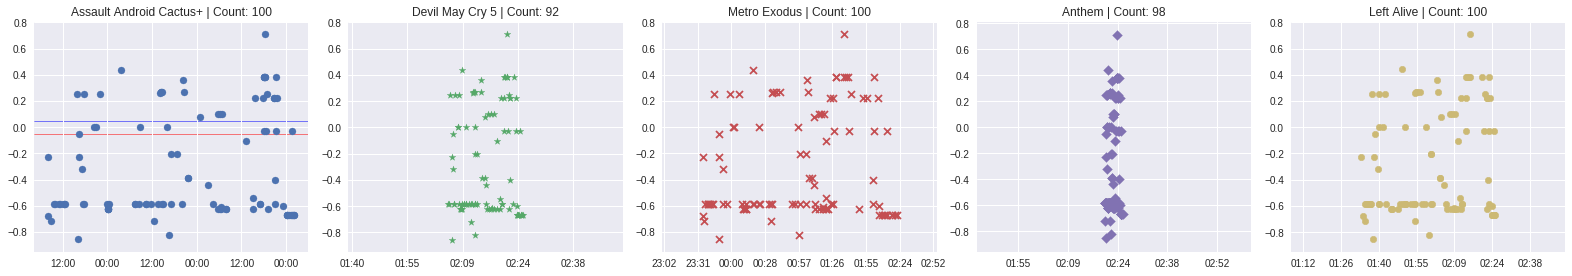

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22, 4))

tt1 = matplotlib.dates.date2num(data2[data2.Game==top_games[0]].loc[:,'Tweet time'])
tp1=data2[data2.Game==top_games[0]].loc[:,'compPolarity']
tt2 = matplotlib.dates.date2num(data2[data2.Game==top_games[1]].loc[:,'Tweet time'])
tp2=data2[data2.Game==top_games[1]].loc[:,'compPolarity']
tt3 = matplotlib.dates.date2num(data2[data2.Game==top_games[2]].loc[:,'Tweet time'])
tp3=data2[data2.Game==top_games[2]].loc[:,'compPolarity']
tt4 = matplotlib.dates.date2num(data2[data2.Game==top_games[3]].loc[:,'Tweet time'])
tp4=data2[data2.Game==top_games[3]].loc[:,'compPolarity']
tt5 = matplotlib.dates.date2num(data2[data2.Game==top_games[4]].loc[:,'Tweet time'])
tp5=data2[data2.Game==top_games[4]].loc[:,'compPolarity']

myFmt = mdates.DateFormatter('%H:%M')

axes[0].set_title(top_games[0]+" | Count: "+str(data2[data2.Game==top_games[0]].shape[0]))
axes[0].scatter(tt1, tp1, color='C0')
axes[0].xaxis.set_major_formatter(myFmt)
axes[0].axhline(y=0.05,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axes[0].axhline(y=-0.05,xmin=0,xmax=3,c="red",linewidth=0.5,zorder=0)

axes[1].set_title(top_games[1]+" | Count: "+str(data2[data2.Game==top_games[1]].shape[0]))
axes[1].scatter(tt2, tp2, color='C1', marker='*')
axes[1].xaxis.set_major_formatter(myFmt)

axes[2].set_title(top_games[2]+" | Count: "+str(data2[data2.Game==top_games[2]].shape[0]))
axes[2].scatter(tt3, tp3, color='C2', marker='x')
axes[2].xaxis.set_major_formatter(myFmt)

axes[3].set_title(top_games[3]+" | Count: "+str(data2[data2.Game==top_games[3]].shape[0]))
axes[3].scatter(tt4, tp4, color='C3', marker='D')
axes[3].xaxis.set_major_formatter(myFmt)

axes[4].set_title(top_games[4]+" | Count: "+str(data2[data2.Game==top_games[4]].shape[0]))
axes[4].scatter(tt5, tp5, color='C4', marker='8')
axes[4].xaxis.set_major_formatter(myFmt)

#axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
#axes.subplots(sharex=True,sharey=True)

#data2.Game.unique()
#plt.figure()
#plt.scatter(Tweet_time, Tweet_Polarity,c='green',marker='o')
#plt.xlabel('Tweet Time',fontsize=13)
#plt.ylabel('Polarity',fontsize=13)
#plt.gcf().autofmt_xdate()
#myFmt = mdates.DateFormatter('%H:%M:%S')
#plt.gca().xaxis.set_major_formatter(myFmt)
#axes.gca().xaxis.set_major_formatter(myFmt)
#plt.plot(np.unique(Tweet_time), np.poly1d(np.polyfit(Tweet_time, Tweet_Polarity, 1))(np.unique(Tweet_time)))   ---To overplot line on scatter